<h1>Background to the study</h1>

Households have electricity usage needs. This electricity can be purchased from an electricity provider or generated using solar panels.

Naomi has installed solar panels on the roof of her house to generate electricity from the sun. Currently the electricity generated from the solar panels is used to meet any electricity usage in the house at the time it is generated. This saves Naomi money on her electricity costs because it reduces the amount of electricity she needs to buy from her electricity provider.

Naomi currently receives no benefit or income for the electricity generated by the solar panels that exceeds her electricity usage. She is, therefore, considering purchasing and installing a battery that would store any excess electricity generated from the solar panels. The battery would then discharge its energy to satisfy Naomi’s electricity usage at times when not enough solar power is being generated.

Electricity (including that generated by solar panels, stored in the battery and purchased from the electricity provider) is measured in kilowatt hours (kWh).

The battery that Naomi is considering costs $7,000 and would be installed on 1 January 2022, with an expected working lifetime of 20 years. The battery can store a maximum amount of
12.5 kWh of electricity at any one time (and is subject to a minimum of 0 kWh). Any electricity generated from the solar panels when the battery is full will not be able to be stored. Electricity usage would first be met from current solar electricity generation, then from any stored battery energy and finally by paying for electricity from the electricity provider.

From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter. A recent government report estimated electricity price inflation over the next 20 years to be 4% p.a. Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% p.a. and she
estimates that electricity price inflation may increase by an additional 0.25% p.a. year on year (i.e. an increase of 4.0% p.a. at 1 January 2023, 4.25% p.a. at 1 January 2024, 4.50% at
1 January 2025, etc.).

To help Naomi analyse whether installing a battery would be cost effective, she has installed a measuring device and provided you with data showing her solar electricity generation and electricity usage for 2020 in hourly increments. (Data has not been provided for 29 February. This date can be ignored.) Naomi has asked you to analyse the potential savings in her electricity costs from purchasing a battery. She has asked you to consider the data on an hourly basis. Hour 0 means the time between 0000hrs and 0100hrs, Hour 1 means the time between 0100hrs and 0200hrs, and so on.

Naomi has asked you to calculate the extra amount of electricity (in kWh) that could be met from the solar panel and battery combination compared to just solar panels and the implied dollar ($) saving in electricity costs of installing the battery. For the following two scenarios, she would also like you to calculate the NPV of the battery investment using a discount rate of 6% p.a. and also the IRR:

<p>Scenario 1.	Electricity prices increase as expected by the government, 4% p.a.</p>
<p>Scenario 2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a, as estimated by Naomi.</p>

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])
await piplite.install(['numpy_financial'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
solar_data = pd.read_csv('solar_data.csv')
solar_data.head()

,Hour,date,solar electricity generated,electricity used
0,0,01/01/2020,0.0,1.509849
1,1,01/01/2020,0.0,1.411859
2,2,01/01/2020,0.0,1.023898
3,3,01/01/2020,0.0,0.642000
4,4,01/01/2020,0.0,0.960000


<p>We use the info() method to get an idea of the data types that are present in our data. It also gives information on the number of null values present in our data. These information help in pre-processing our data into the correct data types and also making us aware of null values in the data.</p>

In [4]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hour                         8760 non-null   int64  
 1   date                         8760 non-null   object 
 2   solar electricity generated  8760 non-null   float64
 3   electricity used             8760 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


<p>We notice that the 'date' column is not in the correct data type for this analysis. We transform it into our desired data type, the datetime datatype.</p>

In [5]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=True)
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Hour                         8760 non-null   int64         
 1   date                         8760 non-null   datetime64[ns]
 2   solar electricity generated  8760 non-null   float64       
 3   electricity used             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.8 KB


<p>We use the describe method to try to get a feeling of how our data looks like. This is one of the first steps in data analysis and can be used to identify outliers in the data.</p>

In [6]:
solar_data.describe()

,Hour,solar electricity generated,electricity used
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.317148
std,6.922582,2.026098,491.479740
min,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621469
75%,17.250000,1.272750,1.689150
max,23.000000,13.050000,46000.000000


<p>We see that we have a maximum electricity usage of 46000 kWh. In our case, this cannot be true. We will assume that the data was incorrectly entered and that the correct entry should have been 46 kWh.</p>

In [7]:
solar_data[solar_data['electricity used'] == 46000].index  #We find the index where the value of electricity usage is 46000

Int64Index([276], dtype='int64')

In [8]:
solar_data.loc[276, 'electricity used'] = 46 #Changing the value to 46
solar_data.describe()

,Hour,solar electricity generated,electricity used
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,2.071258
std,6.922582,2.026098,4.662994
min,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621469
75%,17.250000,1.272750,1.689150
max,23.000000,13.050000,61.102800


<p>We can view this visually using a graph showing monthly electricity used and generated by solar power.</p>

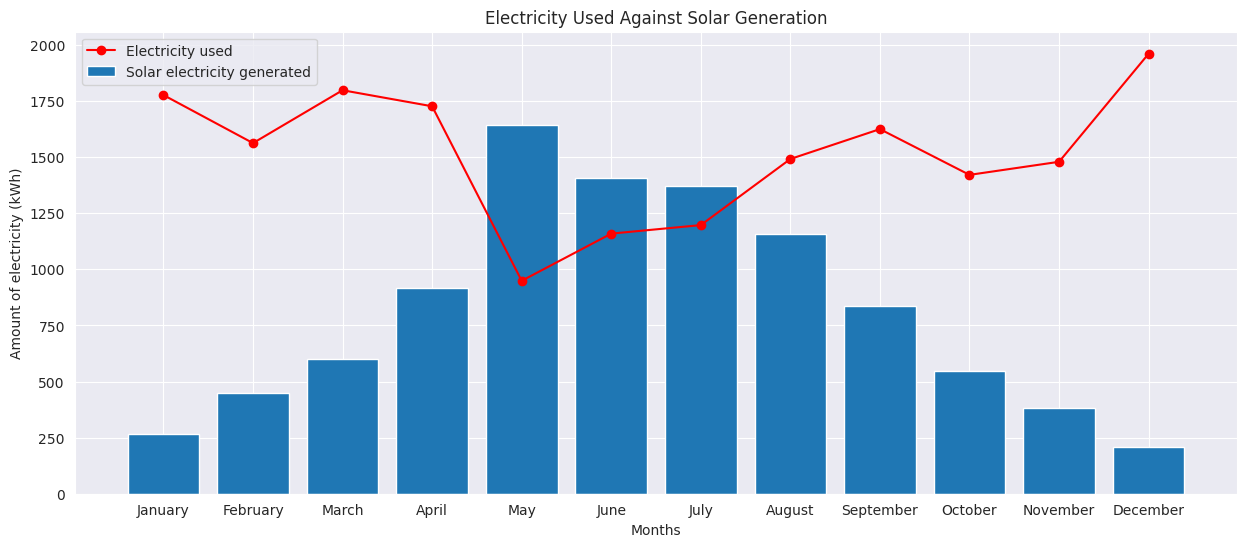

In [100]:
u = np.arange(1, 13)
mon = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(15, 6))
plt.bar(u, solar_data['solar electricity generated'].groupby(solar_data['month']).sum(), label='Solar electricity generated')
plt.plot((solar_data['electricity used'].groupby(solar_data['month']).sum()), 'o-r', label='Electricity used')
plt.title('Electricity Used Against Solar Generation')
plt.xticks(ticks=u, labels=mon, rotation=0)
plt.ylabel('Amount of electricity (kWh)')
plt.xlabel('Month')
plt.legend()
plt.show()

<b>What quantity of electricity do we buy?</b>

<p>We buy the deficit between the amount of electricity that we consume within a particular period and the electricity we produce by solar power. We can create a new column for this:</p>

In [101]:
solar_data['electricity bought'] = solar_data['electricity used'] - solar_data['solar electricity generated']
solar_data.head(20)  

,Hour,date,month,solar electricity generated,electricity used,electricity bought,excess electricity from solar power,battery charge,electricity bought with battery
0,0,2020-01-01,1,0.0,1.509849,1.509849,0.0,0.0,1.509849
1,1,2020-01-01,1,0.0,1.411859,1.411859,0.0,0.0,1.411859
2,2,2020-01-01,1,0.0,1.023898,1.023898,0.0,0.0,1.023898
3,3,2020-01-01,1,0.0,0.642000,0.642000,0.0,0.0,0.642000
4,4,2020-01-01,1,0.0,0.960000,0.960000,0.0,0.0,0.960000


<p>We notice that we have negative values in some of the rows in the 'electricity bought' column. This is because the amount of electricity produced by Naomi's solar panels, sometimes, exceeds the amount of eletricity that she uses at a particular time. We need to validate these negative values to zero because at those times, Naomi does not buy electricity.</p>

In [10]:
for index in solar_data.index:
    if solar_data.loc[index, 'electricity bought'] < 0:
        solar_data.loc[index, 'electricity bought'] = 0
        
solar_data.describe()

,Hour,solar electricity generated,electricity used,electricity bought
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,2.071258,1.790364
std,6.922582,2.026098,4.662994,4.552463
min,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.300000,0.000000
50%,11.500000,0.024000,0.621469,0.345483
75%,17.250000,1.272750,1.689150,1.488000
max,23.000000,13.050000,61.102800,61.096800


<b>What amount of electricity does Naomi's solar panels produce in excess of the amount of electricity she uses at a particular time?</b>
<p>This is the difference between the amount of electricity she produces from her solar panels and the amount of electricity that she consumes. </p>

In [11]:
solar_data['excess electricity from solar power'] = solar_data['solar electricity generated'] - solar_data['electricity used']
solar_data.head(5)

,Hour,date,solar electricity generated,electricity used,electricity bought,excess electricity from solar power
0,0,2020-01-01,0.0,1.509849,1.509849,-1.509849
1,1,2020-01-01,0.0,1.411859,1.411859,-1.411859
2,2,2020-01-01,0.0,1.023898,1.023898,-1.023898
3,3,2020-01-01,0.0,0.642000,0.642000,-0.642000
4,4,2020-01-01,0.0,0.960000,0.960000,-0.960000


<p>We notice that we have negative values in some of the rows in the 'excess electricity from solar power' column. This is because the amount of electricity that she uses at a particular time sometimes exceeds the amount of eletricity produced by Naomi's solar panels. We need to validate these negative values to zero because at those times, Naomi does not produce excess electricity from her solar panels.</p>

In [12]:
for index in solar_data.index:
    if solar_data.loc[index, 'excess electricity from solar power'] < 0:
        solar_data.loc[index, 'excess electricity from solar power'] = 0
        
solar_data.head(10)

,Hour,date,solar electricity generated,electricity used,electricity bought,excess electricity from solar power
0,0,2020-01-01,0.000,1.509849,1.509849,0.00
1,1,2020-01-01,0.000,1.411859,1.411859,0.00
2,2,2020-01-01,0.000,1.023898,1.023898,0.00
3,3,2020-01-01,0.000,0.642000,0.642000,0.00
4,4,2020-01-01,0.000,0.960000,0.960000,0.00
5,5,2020-01-01,0.012,0.897000,0.885000,0.00
6,6,2020-01-01,0.006,0.648000,0.642000,0.00
7,7,2020-01-01,0.009,0.774000,0.765000,0.00
8,8,2020-01-01,0.012,1.299000,1.287000,0.00
9,9,2020-01-01,0.846,0.606000,0.000000,0.24


<p>We can create graphs showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hours within a 24-hour period.</p>

In [13]:
ave_solar_production_per_hour = solar_data['solar electricity generated'].groupby(solar_data['Hour']).mean()
ave_elec_usage_per_hour = solar_data['electricity used'].groupby(solar_data['Hour']).mean()

ave_elec_per_hour = pd.DataFrame({'Average Solar Electricity Generated Per Hour': ave_solar_production_per_hour,
                         'Average Electricity Used Per Hour': ave_elec_usage_per_hour})

ave_elec_per_hour

,Average Solar Electricity Generated Per Hour,Average Electricity Used Per Hour
Hour,,
0,0.000000,0.816471
1,0.035753,0.401552
2,0.000000,0.250623
3,0.000000,0.407688
4,0.078559,0.552038
5,0.270625,0.610852
6,0.722868,2.084071
7,1.394885,1.788123
8,2.206044,1.809732


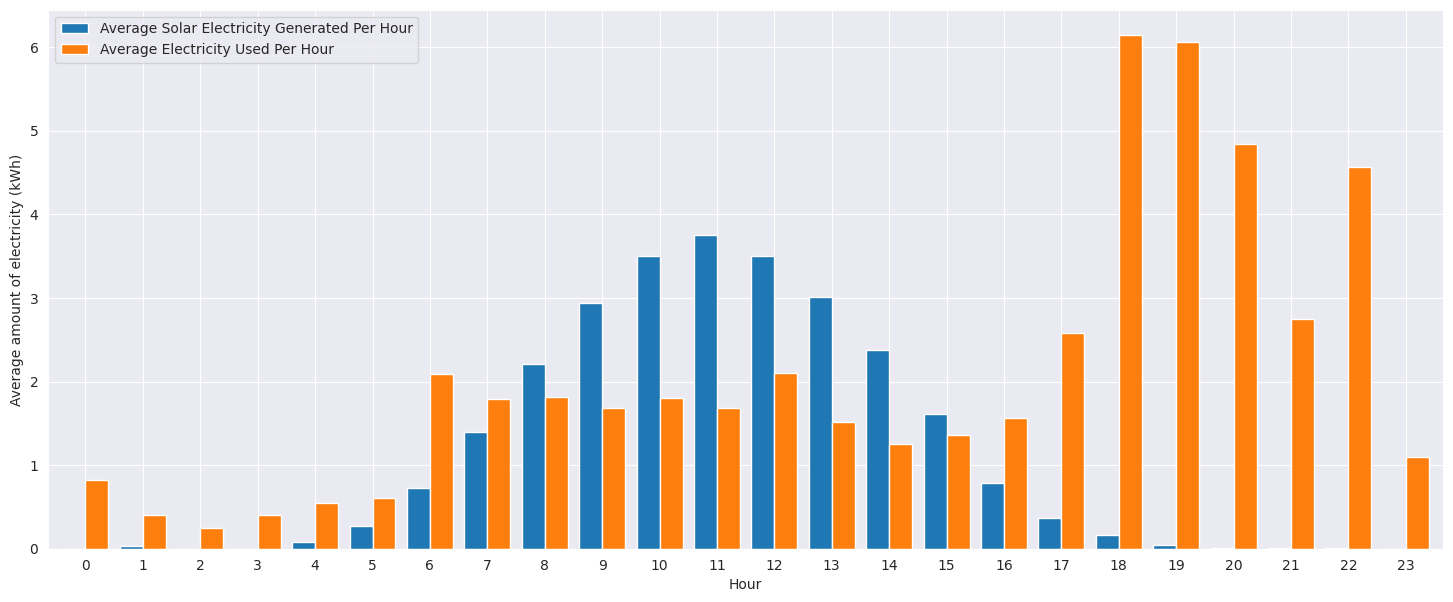

In [14]:
x = np.arange(24)
ave_elec_per_hour.plot(kind='bar', width=0.8, figsize=(18, 7))
plt.xlabel('Hour')
plt.ylabel('Average amount of electricity (kWh)')
plt.xticks(x, rotation=0)
plt.legend()
plt.show()

<p>We can make the following conclusions:</p>
<ol>
    <li>Naomi's solar panels produced more electricity than she consumed between the hours of 0800hrs and 1500hrs. This corresponds with daytime when the sun is overhead                 providing sunlight. The low consumption may also be explained by little activity in the house, ie when she is at work.</li>
    <li>On average, Naomi consumed the most electricity between the hours of  1700hrs and 2200hrs. This corresponds with the time she is expected to be at home from her               daytime actvities.</li>
    <li>Naomi spent the most electricity bewteeen 1800hrs and 2000hrs. This period corresponds with the time she is, perhaps, preparing her meals.</li>
    <li>We should investigate the numbers behind solar production in hours 0100hrs, 0400hrs, and 0500hrs. This is because, typically, we expect to have no sunlight at these               times.</li>
</ol>

<p>We can also get the average amount of electricity Naomi uses or generates from her solar panels <b>per month</b>. First, we create a new column for the monthly periods using the dt.month_name pandas function.</p>

In [15]:
month = pd.DatetimeIndex(solar_data['date']).month
solar_data.insert(loc=2, column='month', value=month) #Creates the month column immediately after the date column
solar_data.head(5)

,Hour,date,month,solar electricity generated,electricity used,electricity bought,excess electricity from solar power
0,0,2020-01-01,1,0.0,1.509849,1.509849,0.0
1,1,2020-01-01,1,0.0,1.411859,1.411859,0.0
2,2,2020-01-01,1,0.0,1.023898,1.023898,0.0
3,3,2020-01-01,1,0.0,0.642000,0.642000,0.0
4,4,2020-01-01,1,0.0,0.960000,0.960000,0.0


In [16]:
ave_solar_production_per_month = solar_data['solar electricity generated'].groupby(solar_data['month']).mean()
ave_elec_usage_per_month = solar_data['electricity used'].groupby(solar_data['month']).mean()

ave_elec_per_month = pd.DataFrame({'Average Solar Electricity Generated Per Month': ave_solar_production_per_month,
                                   'Average Electricity Used Per Month': ave_elec_usage_per_month})

ave_elec_per_month

,Average Solar Electricity Generated Per Month,Average Electricity Used Per Month
month,,
1,0.357875,2.387672
2,0.669098,2.324821
3,0.809746,2.416478
4,1.271017,2.397717
5,2.206129,1.275312
6,1.955954,1.609716
7,1.843367,1.608813
8,1.557310,2.004738
9,1.160667,2.256484


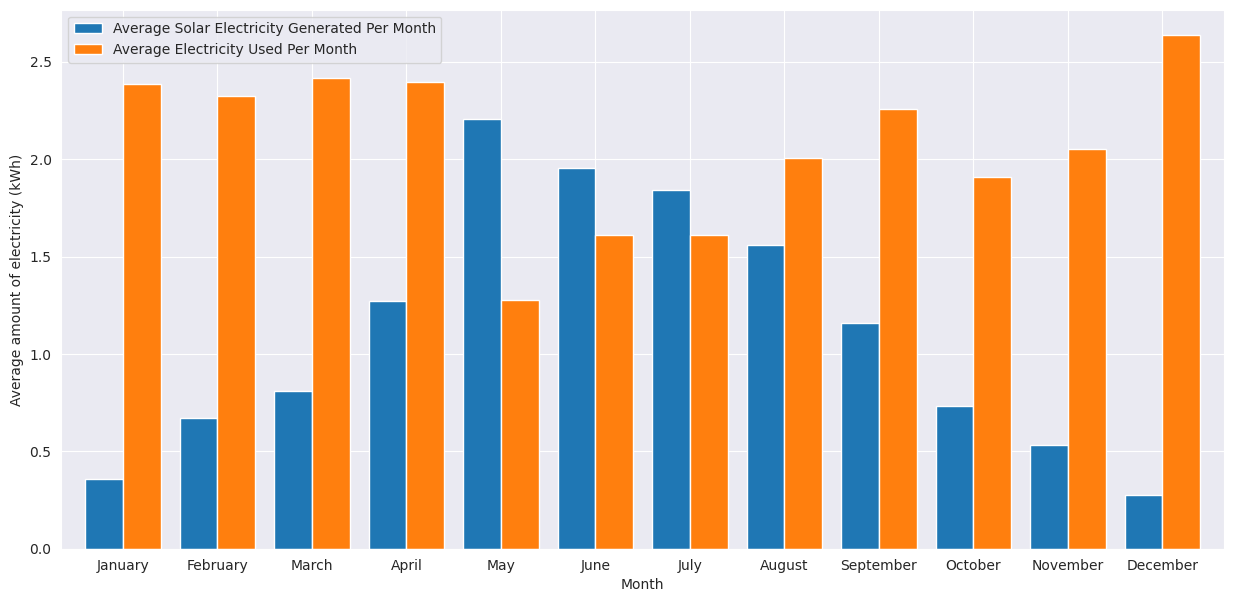

In [17]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x = np.arange(12)
ave_elec_per_month.plot(kind='bar', width=0.8, figsize=(15, 7))
plt.xlabel('Month')
plt.ylabel('Average amount of electricity (kWh)')
plt.xticks(ticks=x, labels=month_names, rotation=0)
plt.legend()
plt.show()

<p>We can make the following conclusion:</p>
<ul>
    <li>Naomi used on average between 2-2.5 kWh of electricity all year round, except in the middle months of May, June, and July;             where consumption dropped to levels of between 1.2-1.6 kWh. The three months coincided with the time her solar panels                 generated the most electricity. This could be an indication that these three months are the times we expect to have summer,           and that the extra elecricity she uses for the rest of the year, August to April the next year, is to provide warmth during the cold season.     </li>
</ul>

In [18]:
solar_data.head(10)

,Hour,date,month,solar electricity generated,electricity used,electricity bought,excess electricity from solar power
0,0,2020-01-01,1,0.000,1.509849,1.509849,0.00
1,1,2020-01-01,1,0.000,1.411859,1.411859,0.00
2,2,2020-01-01,1,0.000,1.023898,1.023898,0.00
3,3,2020-01-01,1,0.000,0.642000,0.642000,0.00
4,4,2020-01-01,1,0.000,0.960000,0.960000,0.00
5,5,2020-01-01,1,0.012,0.897000,0.885000,0.00
6,6,2020-01-01,1,0.006,0.648000,0.642000,0.00
7,7,2020-01-01,1,0.009,0.774000,0.765000,0.00
8,8,2020-01-01,1,0.012,1.299000,1.287000,0.00
9,9,2020-01-01,1,0.846,0.606000,0.000000,0.24


<h1>Total Electricity</h1>
<p>The total amounts of electricity that was produced from solar panels, used, bought, and that was in excess of the electricity used are:</p>

In [19]:
tot_solar_gen = solar_data['solar electricity generated'].sum()
tot_elec_used = solar_data['electricity used'].sum()
tot_elec_bought = solar_data['electricity bought'].sum()
tot_excess_elec = solar_data['excess electricity from solar power'].sum()

print(f"The total amount of electricity generated by solar panels is:{tot_solar_gen:.>40}")
print(f"The total amount of electricity used is:{tot_elec_used:.>65}")
print(f"The total amount of electricity bought is:{tot_elec_bought:.>63}")
print(f"The total amount of excess electricity generated by solar panels is:{tot_excess_elec:.>37}")

The total amount of electricity generated by solar panels is:................................9782.727
The total amount of electricity used is:....................................................18144.2167628
The total amount of electricity bought is:..................................................15683.5857944
The total amount of excess electricity generated by solar panels is:.........................7322.0960316


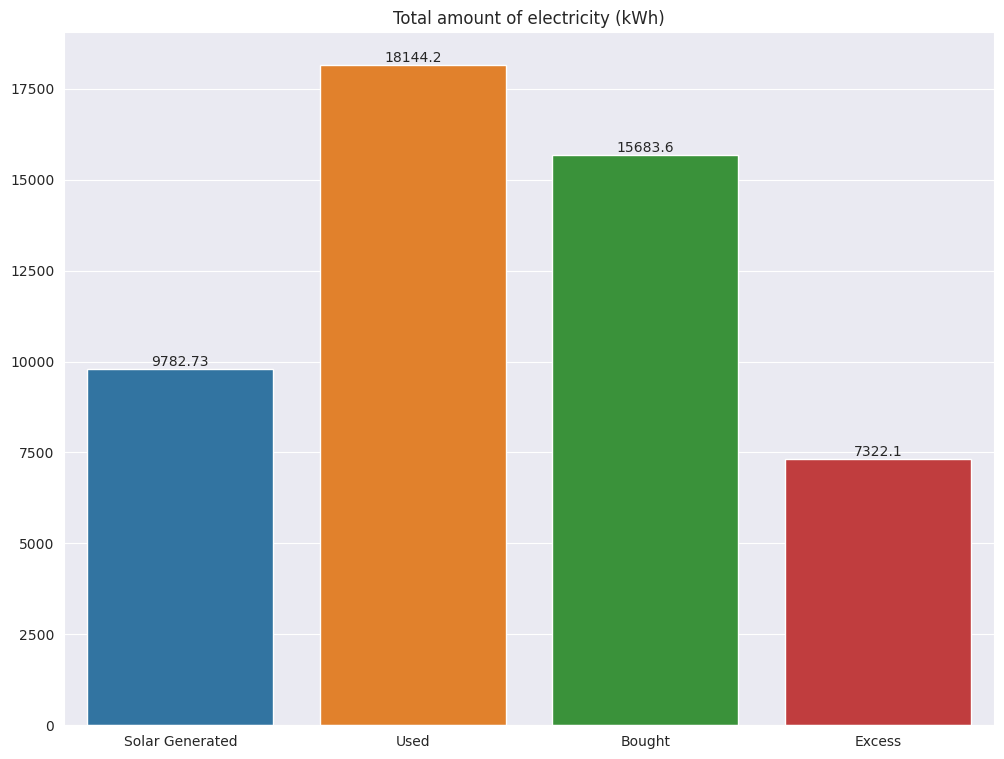

In [20]:
x_label = ['Solar Generated', 'Used', 'Bought', 'Excess']
m = np.arange(4)

plt.figure(figsize=(12, 9))
ax = sns.barplot(solar_data.iloc[:, 3:7], estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(ticks=m, labels=x_label)
plt.title('Total amount of electricity (kWh)')
plt.show()

In [21]:
per_excess_solar_elec = solar_data['excess electricity from solar power'].sum() / solar_data['solar electricity generated'].sum() 
per_tot_elec_bought = solar_data['electricity bought'].sum() / solar_data['electricity used'].sum()
per_solar_elec_gen = solar_data['solar electricity generated'].sum() / solar_data['electricity used'].sum()

print(f"The percentage of excess electricity generated by solar panels is:{per_excess_solar_elec:.>41.2f}")
print(f"The percentage of electricity bought to total electricity used is:{per_tot_elec_bought:.>41.2f}")
print(f"The percentage of solar electricity generated to total electricity used is:{per_solar_elec_gen:.>32.2f}")

The percentage of excess electricity generated by solar panels is:.....................................0.75
The percentage of electricity bought to total electricity used is:.....................................0.86
The percentage of solar electricity generated to total electricity used is:............................0.54


<p>We can draw the following conclusions from Naomi's total 2020 electricity usage and generation from solar panels:</p>
<ol>
    <li>Naomi used a total of 18144 kWh of electricity.</li>
    <li>Naomi's solar panels produced a total of 9782 kWh of electricity.</li>
    <li>The excess electricity that she produced from her solar panels was 7322 kWh. This was roughly 75% of the amount of electricity         she produced from her solar panels. That is a very large percentage of electricity that goes to waste and she could benefit by         storing some of it. This reveals that she was only able to use 25% of the electricity she produced from her solar panels.</li>
    <li>Naomi bought 15683 kWh of electricity. This was about 86% of the total amount of electricity she used. Considering that she           also has the option of using electricity from her solar panels, this big percentage shows inefficiency in the solar                   electricity that she generates.</li>
    <li>In a perfect situation, where all the electricity generated from the solar panels is used, Naomi can produce about 54% of her         electricity needs from her solar panels. This will be limited by her battery storage capacity. This situation can greatly             reduce her spending on electricity.</li>
</ol>

<h6><h6>

<h1>What if she installed a battery?</h1>
<p>Naomi is thinking of installing a battery with a capacity of storing upto 12.5 kWh at any one time. How much will she save in terms of electricity bought? Is the value significant? Is the purchase of the battery economically viable?</p>
<p>To answer these questions, we first build a model that can keep track of the battery's charge, and show the amount of electricity that is purchased after installation of the battery.</p>

In [22]:
cum_bat_charge = []  #List containing values of cumulative battery charge
bought_after_bat = [] #List containing values of electricity bought after installation of battery
charge = 0
max_charge = 12.5

for i in solar_data.index:
    excess = solar_data.loc[i, 'solar electricity generated'] - solar_data.loc[i, 'electricity used']
    bat = charge + excess
    if excess >= 0:
        bought_after_bat.append(0)
        if bat >= max_charge:
            charge = max_charge
            cum_bat_charge.append(charge)
        else:
            charge = bat
            cum_bat_charge.append(charge)
    else:
        if bat < 0:
            bat *= -1
            charge = 0
            cum_bat_charge.append(charge)
            bought_after_bat.append(bat)
        else:
            charge = bat
            cum_bat_charge.append(charge)
            bought_after_bat.append(0)
            
        
solar_data['battery charge'] = cum_bat_charge
solar_data['electricity bought with battery'] = bought_after_bat
solar_data.head()

,Hour,date,month,solar electricity generated,electricity used,electricity bought,excess electricity from solar power,battery charge,electricity bought with battery
0,0,2020-01-01,1,0.0,1.509849,1.509849,0.0,0.0,1.509849
1,1,2020-01-01,1,0.0,1.411859,1.411859,0.0,0.0,1.411859
2,2,2020-01-01,1,0.0,1.023898,1.023898,0.0,0.0,1.023898
3,3,2020-01-01,1,0.0,0.642000,0.642000,0.0,0.0,0.642000
4,4,2020-01-01,1,0.0,0.960000,0.960000,0.0,0.0,0.960000


<h3>Savings</h3>

In [23]:
m = solar_data['electricity bought'].sum()
n = solar_data['electricity bought with battery'].sum()
p = m - n
saving = 0.17 * p
percent = p / m

print(f'Total electricity bought without battery{m:.>25}')
print(f'Total electricity bought with battery{n:.>28}')
print(f'Savings on the amount of electricity bought{p:.>28}')
print(f'Percentage savings{percent:.>42.2f}')
print(f'Monetary savings{saving:.>55}')

Total electricity bought without battery............15683.5857944
Total electricity bought with battery...............12184.8622886
Savings on the amount of electricity bought..........3498.7235058000006
Percentage savings......................................0.22
Monetary savings......................................594.7829959860002


<p>We see that installation of a battery, with a capacity of 12.5 kWh, can help Naomi reduce the amount of electricity she buys by about 3499 kWh or about 22.3%. We are told that each kWh of electricity costs 0.17 dollars. Therefore, Naomi can reduce her spending on electicity, without inflation, by about 595 dollars every year.</p>

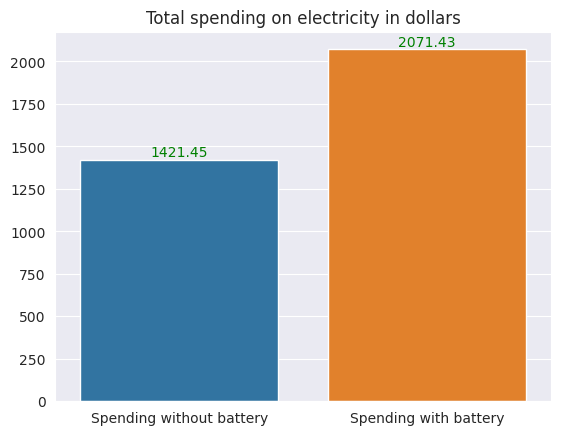

In [121]:
save = solar_data[['electricity bought', 'electricity bought with battery']] * 0.17

x_label = ['Spending without battery', 'Spending with battery']
m = np.arange(2)

ax = sns.barplot(save, estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(ticks=m, labels=x_label)
plt.title('Total spending on electricity in dollars')
plt.show()

<p>We can use the data that we now have to produce a chart to illustrate, on a monthly basis for the calendar year 2020 and measured in kWh, the:</p>
<ul>
    <li>Monthly solar generation.</li>
    <li>Monthly electricity usage.</li>
    <li>Monthly electricity purchased from the electricity provider (no battery).</li>
    <li>Monthly electricity purchased from the electricity provider (with battery).</li>
</ul>

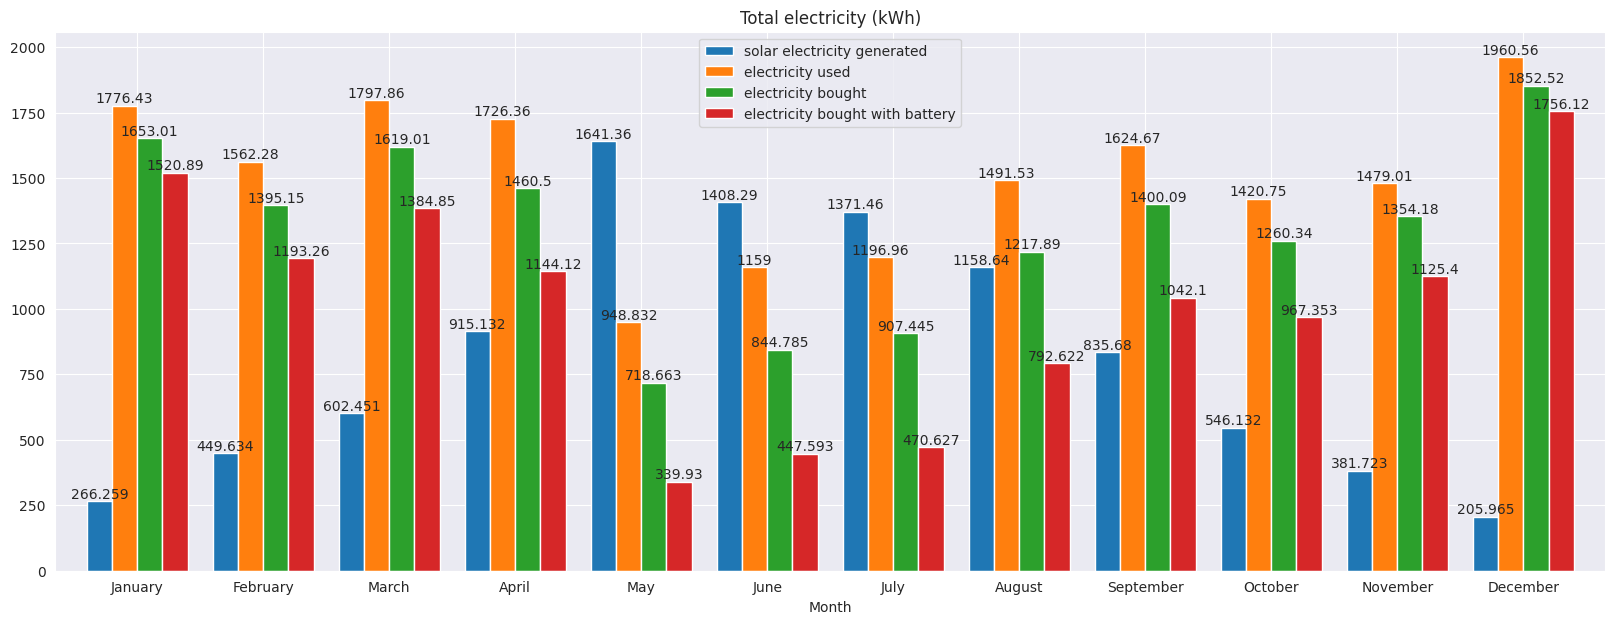

In [25]:
month_data = solar_data[['solar electricity generated', 'electricity used', 'electricity bought', 'electricity bought with battery']].groupby(solar_data['month']).sum()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
m = np.arange(12)

ax = month_data.plot(kind='bar', width=0.8, figsize=(20, 7))
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(ticks=m, labels=month_names, rotation=0)
plt.title('Total electricity (kWh)')
plt.xlabel('Month')
plt.legend()
plt.show()

<p>We can make the following observations</p>
<ol>
    <li>Naomi used the most amount electricity during the month of December, and the least amount of electricity during the month of May.</li>
    <li>Solar electricity generation was highest in the month of May, and lowest in the month of December.</li> 
</ol>

<h6></h6>

<h1>Electricity cost analysis.</h1>

We are told that from 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter. A recent government report estimated electricity price inflation over the next 20 years to be 4% p.a. Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% p.a. and she estimates that electricity price inflation may increase by an additional 0.25% p.a. year on year (i.e. an increase of 4.0% p.a. at 1 January 2023, 4.25% p.a. at 1 January 2024, 4.50% at 1 January 2025, etc.).
We can create a new data frame using these values.

In [26]:
elec_cost = pd.DataFrame() #We begin by creating a new data frame object that we will populate with values

gov_inf = [1]
g_inf = 1
for i in range(1, 20):
    g_inf *= 1.04
    gov_inf.append(g_inf)
    
naomi_inf = [1]
n_inf = 1
r = 0.0025
for i in range(0, 19):
    n_inf *= 1.04 + (r * i)
    naomi_inf.append(n_inf)
    
    
elec_cost['year'] = list(np.arange(2022,2042)) #We create a column of years with values upto 20 years into the future    
elec_cost['government inflation'] = gov_inf #We create a column of predicted government inflation rates
elec_cost['naomi inflation'] = naomi_inf #We create a column of predicted inflation rates according to Naomi
elec_cost['prices with government inflation'] = elec_cost['government inflation'] * 0.17
elec_cost['prices with naomi inflation'] = elec_cost['naomi inflation'] * 0.17


elec_cost.set_index('year', drop=True, inplace=True)

elec_cost.head(5)

,government inflation,naomi inflation,prices with government inflation,prices with naomi inflation
year,,,,
2022,1.000000,1.000000,0.170000,0.170000
2023,1.040000,1.040000,0.176800,0.176800
2024,1.081600,1.084200,0.183872,0.184314
2025,1.124864,1.132989,0.191227,0.192608
2026,1.169859,1.186806,0.198876,0.201757


In [46]:
m = solar_data['electricity bought'].sum()
n = solar_data['electricity bought with battery'].sum()
diff = m - n
dollar = diff * 0.17

print(f'Total electricity bought without battery{m:.>54}')
print(f'Total electricity bought with battery{n:.>57}')
print(f'The amount of electricity that Naomi saves on with a battery is{diff:.>37}')
print(f'The dollar amount of electricity that Naomi saves on with a battery is{dollar:.>30}')

Total electricity bought without battery.........................................15683.5857944
Total electricity bought with battery............................................12184.8622886
The amount of electricity that Naomi saves on with a battery is...................3498.7235058000006
The dollar amount of electricity that Naomi saves on with a battery is.............594.7829959860002


<p>Naomi buys about <b>15683.5857944</b> kWh of electricity without a battery and <b>12184.8622886</b> kWh of electricity with a battery installed. The extra amount of electricity that can be met with Naomi's solar panel and battery combination compared to just the solar panels is approximately 3499 kWh of electricity. This is approximately, as we have seen before, $595 in savings.
<p>We can use these values to get her total predicted spending over the next 20 years. Here, we assume that her electricity consumption and solar electricity generation are constant all through the study years.</p>

In [98]:
elec_cost['cost without battery(gvt inflation)'] = elec_cost['prices with government inflation'] * 15683.5857944   
elec_cost['cost with battery(gvt inflation)'] = elec_cost['prices with government inflation'] * 12184.8622886  
elec_cost['cost without battery(naomi inflation)'] = elec_cost['prices with naomi inflation'] * 15683.5857944
elec_cost['cost with battery(naomi inflation)'] = elec_cost['prices with naomi inflation'] * 12184.8622886 

elec_cost

,government inflation,naomi inflation,prices with government inflation,prices with naomi inflation,cost without battery(gvt inflation),cost with battery(gvt inflation),cost without battery(naomi inflation),cost with battery(naomi inflation),savings (gvt inflation),savings (naomi inflation)
year,,,,,,,,,,
2022,1.000000,1.000000,0.170000,0.170000,2666.209585,2071.426589,2666.209585,2071.426589,594.782996,594.782996
2023,1.040000,1.040000,0.176800,0.176800,2772.857968,2154.283653,2772.857968,2154.283653,618.574316,618.574316
2024,1.081600,1.084200,0.183872,0.184314,2883.772287,2240.454999,2890.704432,2245.840708,643.317288,644.863724
2025,1.124864,1.132989,0.191227,0.192608,2999.123179,2330.073199,3020.786132,2346.903540,669.049980,673.882592
2026,1.169859,1.186806,0.198876,0.201757,3119.088106,2423.276127,3164.273473,2458.381458,695.811979,705.892015
2027,1.216653,1.246146,0.206831,0.211845,3243.851630,2520.207172,3322.487146,2581.300531,723.644458,741.186616
2028,1.265319,1.311569,0.215104,0.222967,3373.605695,2621.015459,3496.917722,2716.818809,752.590237,780.098913
2029,1.315932,1.383705,0.223708,0.235230,3508.549923,2725.856077,3689.248196,2866.243843,782.693846,823.004353
2030,1.368569,1.463268,0.232657,0.248756,3648.891920,2834.890320,3901.379968,3031.052864,814.001600,870.327104


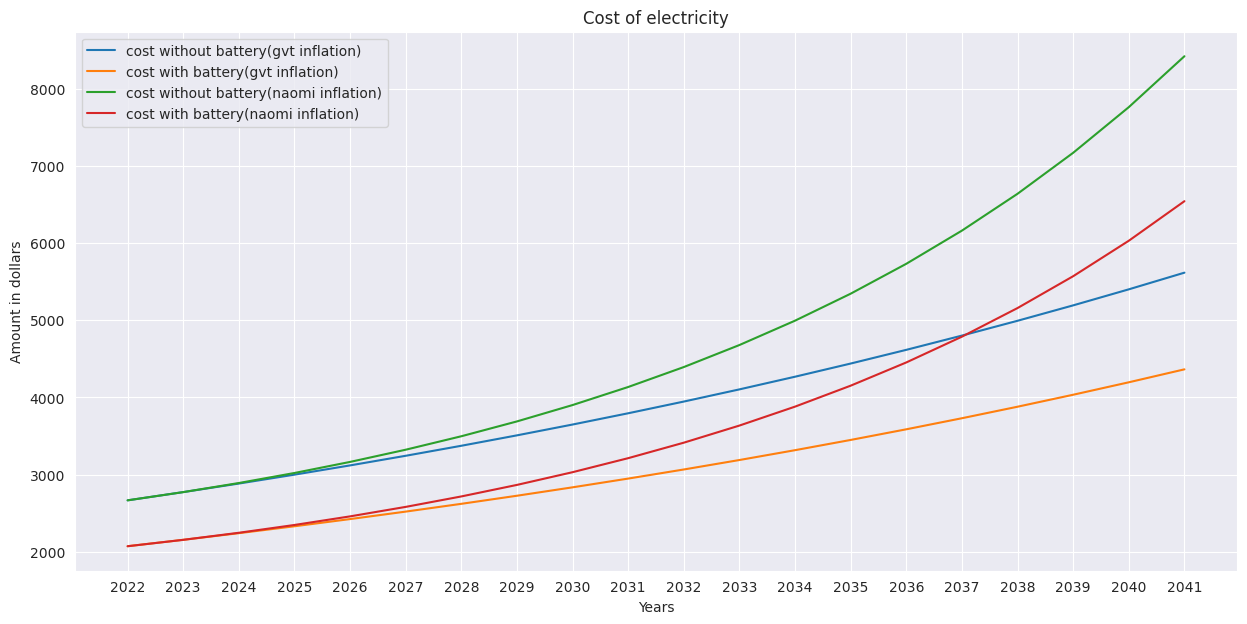

In [29]:
years = np.arange(2022, 2042)

elec_cost.iloc[:,4:8].plot(figsize=(15,7))
plt.title('Cost of electricity')
plt.xlabel('Years')
plt.ylabel('Amount in dollars')
plt.xticks(years, rotation=0)
plt.show()

<p>We can calculate her total potential savings each year under the different inflation scenarios for the next 20 years.</p>

In [30]:
elec_cost['savings (gvt inflation)'] = elec_cost['cost without battery(gvt inflation)'] - elec_cost['cost with battery(gvt inflation)']
elec_cost['savings (naomi inflation)'] = elec_cost['cost without battery(naomi inflation)'] - elec_cost['cost with battery(naomi inflation)']
elec_cost.iloc[:,4:10].sum()

cost without battery(gvt inflation)      79394.598523
cost with battery(gvt inflation)         61683.103733
cost without battery(naomi inflation)    94366.749821
cost with battery(naomi inflation)       73315.239657
savings (gvt inflation)                  17711.494790
savings (naomi inflation)                21051.510164
dtype: float64

<p>We make the following observations:</p>
<ol>
    <li>Naomi will spend less money on electricity when she has a battery than without one. She will save, over the next 20 years, about 17712 dollars under gvt inflation (normal inflation), and 21052 dollars using her own prediction of inflation (increasing inflation).</li> 
    <li>We get the highest costs using Naomi's projectons for inflation.</li>   
</ol>

Naomi would also like us, for the following two scenarios, to calculate the NPV of the battery investment using a discount rate of 6% p.a. and also the IRR:
<ul>
    <li>Scenario 1. Electricity prices increase as expected by the government, 4% p.a.</li>
    <li>Scenario 2. Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a, as estimated by Naomi.</li>
</ul>

<p>The investment of having a battery is the total savings Naomi will have with a battery.</p>

<b>Scenario 1</b>

In [62]:
import numpy_financial as npf

j = elec_cost['savings (gvt inflation)'].values.tolist()
gvt_npv = npf.npv(0.06, j)

j.insert(0, -7000) #We insert the cost of the battery upfront because it's a cash outflow of the IRR calculation.
gvt_irr = npf.irr(j)

print(f'The NPV of battey under government\'s normal inflation is{gvt_npv:.>25}')
print(f'The IRR of battey under government\'s normal inflation is{gvt_irr:.>30}')      

The NPV of battey under government's normal inflation is........9986.563930406124
The IRR of battey under government's normal inflation is...........0.09421946134701531


<b>Scenario 2</b>

In [61]:
k = elec_cost['savings (naomi inflation)'].values.tolist()
naomi_npv = npf.npv(0.06, k)

k.insert(0, -7000) #We insert the cost of the battery upfront because it's a cash outflow of the IRR calculation. 
naomi_irr = npf.irr(k)

print(f'The NPV of battey under naomi\'s increasing inflation is{naomi_npv:.>26of the IRR calculation }')
print(f'The IRR of battey under naomi\'s increasing inflation is{naomi_irr:.>30}') 

The NPV of battey under naomi's increasing inflation is.........11374.80668810774
The IRR of battey under naomi's increasing inflation is.............0.107044193423256


<p>We make the following conclusions:</p>
<ul>
    <li>The NPV of the cash flows she will save over the 20-year period is approximately 9987 dollars under normal inflation and approximately 11375 dollars under increasing inflation. This justifies her investment on the battery as the amounts are greater than her investment of 7000 dollars, i.e. she will save more than she spends on the battery.</li>
    <li>The IRR under normal inflation with battery and increasing inflation with battery are 9.4% and 10.7% respectively, using the initial 7000 dollars as the investment. The two IRR values show that she will get a good return on her investment as they are greater than the discount rate of 6%.</li>
    <li>Using the conclusions above, Naomi's investment on the battery is good, therefore, recommended.</li>
</ul>